In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train = train.drop(columns='Cabin')

train['Sex'][train['Sex']=='male']=0
train['Sex'][train['Sex']=='female']=1
train['Sex']=train['Sex'].astype(int)

train['Embarked'][train['Embarked']=='S']=0
train['Embarked'][train['Embarked']=='C']=1
train['Embarked'][train['Embarked']=='Q']=2

bins = np.arange(0,90,5)
names = np.arange(1, 18, 1)

train['AgeRange'] = pd.cut(train['Age'], bins, labels=names)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112e64550>,
      dtype=object)

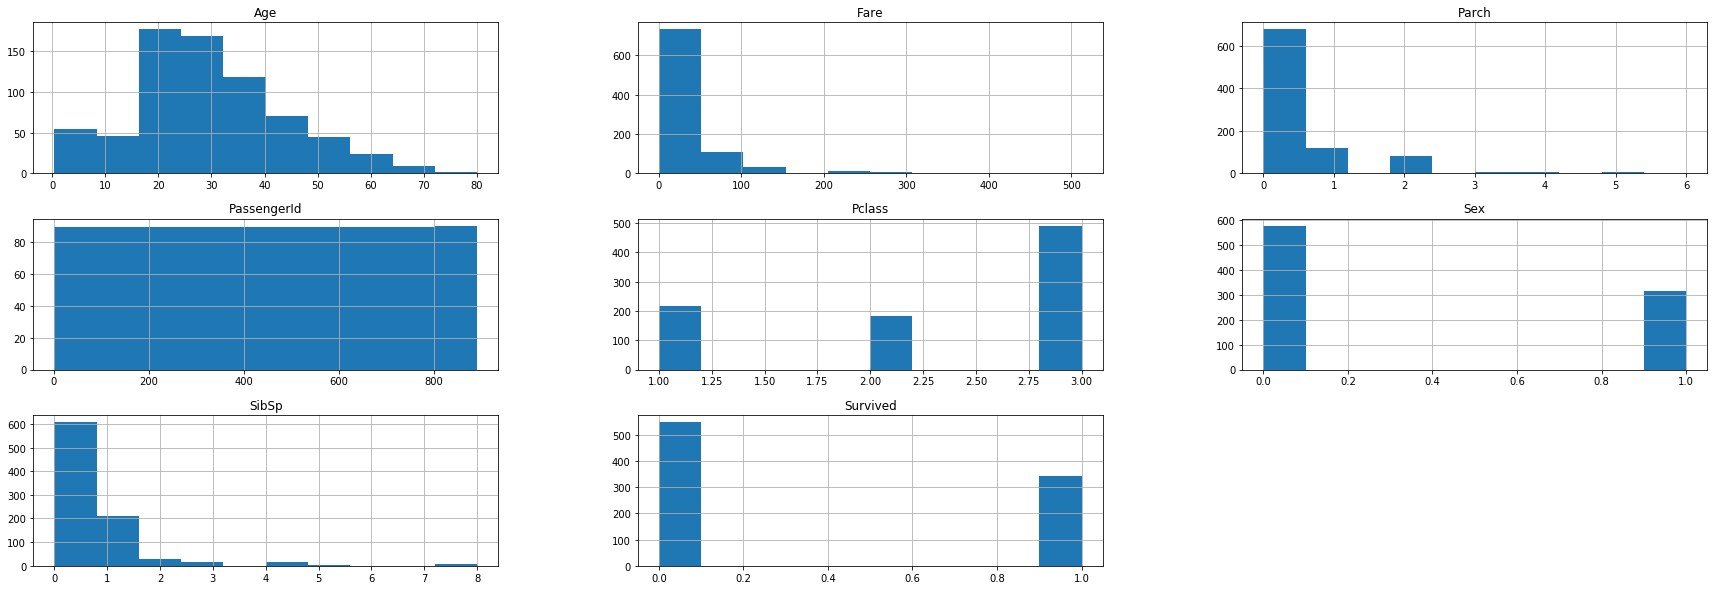

In [6]:
train.hist()

In [7]:
aged = train[train['Age'].notnull()]
aged = aged.dropna()
aged['Embarked']=aged['Embarked'].astype(int)

In [8]:
aged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,8
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,6
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,7
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,7


In [9]:
from sklearn.linear_model import LogisticRegression
# X = aged[['Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Embarked']]
# Y = aged['AgeRange']
X = aged[['Parch', 'Pclass', 'SibSp']]
Y = aged['AgeRange']
agefinder = LogisticRegression(multi_class="multinomial", solver="lbfgs")
agefinder.fit(X, Y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
unaged = train[train['Age'].isnull()]
#pred_age = agefinder.predict(unaged[['Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Embarked']])
pred_age = agefinder.predict(unaged[['Parch', 'Pclass', 'SibSp']])
train['AgeRange']=train['AgeRange'].fillna(pd.Series(pred_age, index = unaged.index))

In [11]:
train = train.drop(columns='Age')
train = train.dropna()
train['Embarked'] = train['Embarked'].astype(int)

In [12]:
test = pd.read_csv('test.csv')

In [13]:
test = test.drop(columns='Cabin')

test['Sex'][test['Sex']=='male']=0
test['Sex'][test['Sex']=='female']=1
test['Sex']=test['Sex'].astype(int)

test['Embarked'][test['Embarked']=='S']=0
test['Embarked'][test['Embarked']=='C']=1
test['Embarked'][test['Embarked']=='Q']=2

bins = np.arange(0,90,5)
names = np.arange(1, 18, 1)

test['AgeRange'] = pd.cut(test['Age'], bins, labels=names)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [14]:
test['Fare']=test['Fare'].fillna(train[(train['Embarked']==0)&(train['Pclass']==3)]['Fare'].mean())

In [15]:
unaged_test = test[test['Age'].isnull()]
#pred_age_test = agefinder.predict(unaged_test[['Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Embarked']])
pred_age_test = agefinder.predict(unaged_test[['Parch', 'Pclass', 'SibSp']])
test['AgeRange']=test['AgeRange'].fillna(pd.Series(pred_age_test, index = unaged_test.index))

In [16]:
test = test.drop(columns='Age')
test = test.dropna()
test['Embarked'] = test['Embarked'].astype(int)

In [17]:
X = train[['AgeRange', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Embarked']]
Y = train['Survived']
model = LogisticRegression(multi_class="multinomial", solver="lbfgs")
model = model.fit(X, Y)

In [18]:
pred_result = model.predict(test[['AgeRange', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Embarked']])

In [19]:
result = pd.concat([test['PassengerId'],pd.Series(pred_result, index = test.index, name = 'Survived')], axis=1)

In [20]:
result.isna().sum()

PassengerId    0
Survived       0
dtype: int64

In [21]:
result.to_csv('submission.csv', index=False)

In [22]:
submission = pd.read_csv('submission.csv')

In [23]:
submission1 = pd.read_csv('submission1.csv')

In [24]:
submission2 = pd.read_csv('submission2.csv')

In [25]:
submission3 = pd.read_csv('submission3.csv')

In [34]:
submission4 = pd.read_csv('submission4.csv')

In [26]:
(submission['Survived']!=submission1['Survived']).sum()

79

In [27]:
(submission['Survived']!=submission2['Survived']).sum()

54

In [28]:
len(submission)

418

In [29]:
(submission1['Survived']!=submission2['Survived']).sum()

41

In [30]:
(submission1['Survived']!=submission3['Survived']).sum()

76

In [31]:
(submission2['Survived']!=submission3['Survived']).sum()

53

In [36]:
(submission2['Survived']!=submission4['Survived']).sum()

56

In [32]:
(submission['Survived']!=submission3['Survived']).sum()

13

In [35]:
(submission['Survived']!=submission4['Survived']).sum()

8